# Predict heart disease

In this activity, you'll use a small [dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) provided by the Cleveland Clinic Foundation for Heart Disease. 

Each row describes a patient, and each column describes an attribute. You will use this information to predict whether a patient has heart disease.

Below is a description of each column.

|  Column  |                           Description                          |  Feature Type  | Data Type |
|:--------:|:--------------------------------------------------------------:|:--------------:|:---------:|
| Age      | Age in years                                                   | Numerical      | integer   |
| Sex      | (1 = male; 0 = female)                                         | Categorical    | integer   |
| CP       | Chest pain type (0, 1, 2, 3, 4)                                | Categorical    | integer   |
| Trestbpd | Resting blood pressure (in mm Hg on admission to the hospital) | Numerical      | integer   |
| Chol     | Serum cholestoral in mg/dl                                     | Numerical      | integer   |
| FBS      | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)        | Categorical    | integer   |
| RestECG  | Resting electrocardiographic results (0, 1, 2)                 | Categorical    | integer   |
| Thalach  | Maximum heart rate achieved                                    | Numerical      | integer   |
| Exang    | Exercise induced angina (1 = yes; 0 = no)                      | Categorical    | integer   |
| Oldpeak  | ST depression induced by exercise relative to rest             | Numerical      | float     |
| Slope    | The slope of the peak exercise ST segment                      | Numerical      | integer   |
| CA       | Number of major vessels (0-3) colored by flourosopy            | Numerical      | integer   |
| Thal     | 3 = normal; 6 = fixed defect; 7 = reversable defect            | Categorical    | string    |
| Target   | Diagnosis of heart disease (1 = true; 0 = false)               | Classification | integer   |

## Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Python version: 3.7.9


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = "retina"
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

# You may add other imports here as needed
# BEGIN SOLUTION CODE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    plot_confusion_matrix,
    classification_report,
    plot_roc_curve,
)
from sklearn.model_selection import cross_val_score
# END SOLUTION CODE

scikit-learn version: 0.23.2


## Step 1: loading the data

### Question

Load the dataset into a pandas DataFrame named `df_heart`.

In [4]:
csv_url = "https://raw.githubusercontent.com/bpesquet/mlkatas/master/_datasets/heart.csv"

# BEGIN SOLUTION CODE
df_heart = pd.read_csv(csv_url)
# END SOLUTION CODE

In [5]:
print(f"df_heart: {df_heart.shape}")

assert df_heart.shape == (301, 14)

df_heart: (301, 14)


## Step 2: prepare the data

### Question

Use the following cells to discover data.

In [6]:
# Print info about the dataset

# BEGIN SOLUTION CODE
df_heart.info()
# END SOLUTION CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    object 
 13  target    301 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.0+ KB


In [7]:
# Print the first 10 data samples

# BEGIN SOLUTION CODE
df_heart.head(n=10)
# END SOLUTION CODE

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


In [8]:
# # Print descriptive statistics for all numerical attributes

# BEGIN SOLUTION CODE
df_heart.describe()
# END SOLUTION CODE

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.571429,0.677741,3.126246,131.684385,246.817276,0.146179,0.996678,149.308970,0.328904,1.061462,1.594684,0.677741,0.275748
std,9.041702,0.468120,1.008634,17.709415,52.186619,0.353874,0.988259,22.953015,0.470597,1.167295,0.617931,0.937623,0.447634
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [9]:
# Print distribution of target values

# BEGIN SOLUTION CODE
df_heart["target"].value_counts()
# END SOLUTION CODE

0    218
1     83
Name: target, dtype: int64

### Question

Use the following cells to prepare data for training:
- Split data between training and test sets with a 20% ratio.
- Store inputs and labels in the `x_train` and `y_train` variables.
- Preprocess training input data as needed.

In [10]:
# Split dataset between training and test

# BEGIN SOLUTION CODE
df_train, df_test = train_test_split(df_heart, test_size=0.2)
# END SOLUTION CODE

In [11]:
print(f"Training dataset: {df_train.shape}")
print(f"Test dataset: {df_test.shape}")

assert df_train.shape == (240, 14)
assert df_test.shape == (61, 14)

Training dataset: (240, 14)
Test dataset: (61, 14)


In [12]:
# Split training dataset between inputs and target

# BEGIN SOLUTION CODE
# Target attribute is removed from training data
df_x_train = df_train.drop("target", axis=1)

# Targets are transformed into a NumPy array for further use during training
y_train = df_train["target"].to_numpy()
# END SOLUTION CODE

In [13]:
print(f"Training data: {df_x_train.shape}")
print(f"Training labels: {y_train.shape}")

assert df_x_train.shape == (240, 13)
assert y_train.shape == (240,)

Training data: (240, 13)
Training labels: (240,)


In [14]:
# Print numerical and categorical features

# BEGIN SOLUTION CODE
num_features = df_x_train.select_dtypes(include=[np.number]).columns
print(num_features)

cat_features = df_x_train.select_dtypes(include=[np.object]).columns
print(cat_features)
# END SOLUTION CODE

# Print all values for the "thal" feature

# BEGIN SOLUTION CODE
df_x_train["thal"].value_counts()
# END SOLUTION CODE

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca'],
      dtype='object')
Index(['thal'], dtype='object')


normal        136
reversible     93
fixed          11
Name: thal, dtype: int64

In [15]:
# Use pipelines to preprocess data

# BEGIN SOLUTION CODE
# This pipeline handles missing values and standardizes features
num_pipeline = Pipeline([("std_scaler", StandardScaler()),])

# This pipeline applies the previous one on numerical features
# It also one-hot encodes the categorical features
full_pipeline = ColumnTransformer(
    [("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features),]
)

# Apply the last pipeline on training data
x_train = full_pipeline.fit_transform(df_x_train)
# END SOLUTION CODE

In [16]:
# Print preprocessed data shape and first sample
print(f"x_train: {x_train.shape}")
print(x_train[0])

assert x_train.shape == (240, 15)

x_train: (240, 15)
[ 0.80857085 -1.4010578   0.90115511  1.67690373 -1.56994143 -0.39223227
  1.02767938 -0.17131234 -0.70710678  4.66439239  2.41459559  2.47701405
  0.          0.          1.        ]


## Step 3: train and evaluate a model

### Question

Use the following cells to:
- Train a SGD classifier on the training data.
- Evaluate its accuracy using K-fold cross-validation.
- Compute the precision, recall and f1-score metrics.
- Plot its confusion matrix and ROC curve.

In [17]:
# Fit a SGD classifier to the training set

# BEGIN SOLUTION CODE
sgd_model = SGDClassifier(loss="log")
sgd_model.fit(x_train, y_train)
# END SOLUTION CODE

SGDClassifier(loss='log')

In [18]:
# Use cross-validation to evaluate accuracy, using 3 folds
# Store the result in the cv_acc variable

# BEGIN SOLUTION CODE
cv_acc = cross_val_score(sgd_model, x_train, y_train, cv=3, scoring="accuracy")
# END SOLUTION CODE

In [19]:
print(f"CV accuracy: {cv_acc}")

assert np.mean(cv_acc) > 0.70

CV accuracy: [0.8625 0.8125 0.775 ]


In [20]:
# Plot the confusion matrix for a model and a dataset
def plot_conf_mat(model, x, y):
    with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
        display = plot_confusion_matrix(
            model, x, y, values_format="d", cmap=plt.cm.Blues
        )

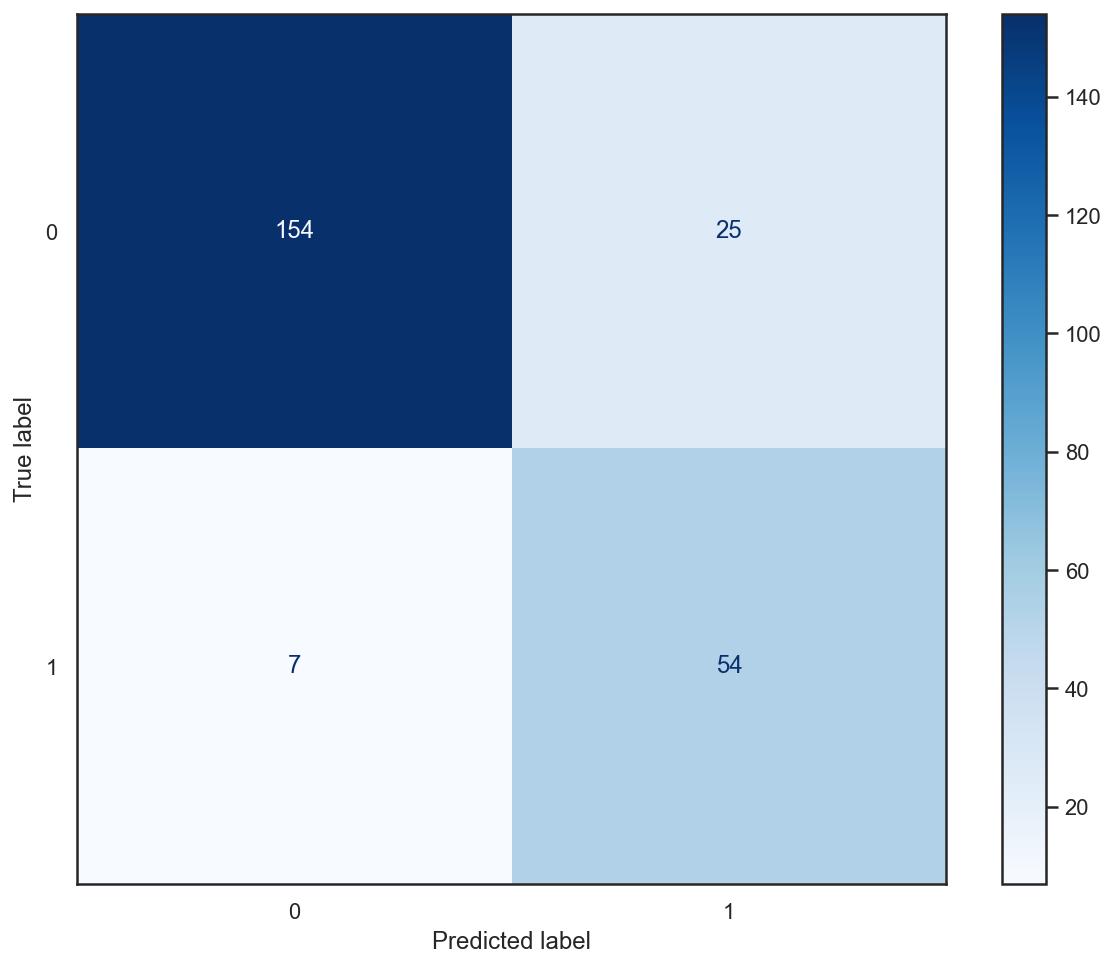

In [21]:
# Plot confusion matrix for the SGD classifier

# BEGIN SOLUTION CODE
plot_conf_mat(sgd_model, x_train, y_train)
# END SOLUTION CODE

In [22]:
# Compute precision, recall and f1-score for the SGD classifier

# BEGIN SOLUTION CODE
print(classification_report(y_train, sgd_model.predict(x_train)))
# END SOLUTION CODE

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       179
           1       0.68      0.89      0.77        61

    accuracy                           0.87       240
   macro avg       0.82      0.87      0.84       240
weighted avg       0.89      0.87      0.87       240



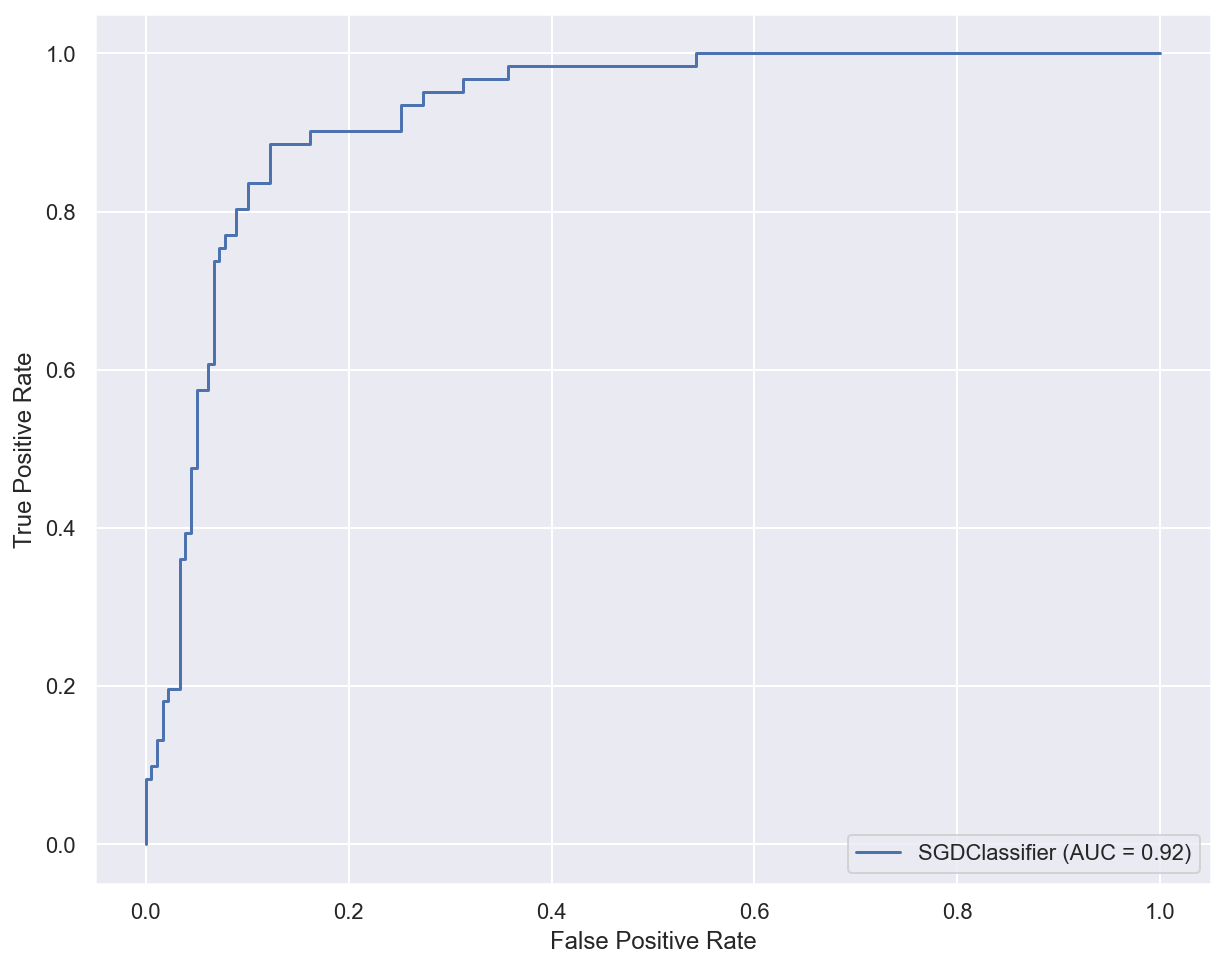

In [23]:
# Plot ROC curve for the SGD classifier

# END SOLUTION CODE
sgd_disp = plot_roc_curve(sgd_model, x_train, y_train)
plt.show()
# END SOLUTION CODE

## Bonus

Train another classifier and plot ROC curves for both.